In [1]:
#Bibliotecas
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import imblearn

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn 
import imblearn
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier




from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score, precision_recall_fscore_support, roc_auc_score

In [3]:
#Ignorando avisos
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Formatação
pd.set_option('display.max_columns', None)
np.set_printoptions(threshold= 15)
np.set_printoptions(precision=3)
sns.set(style="darkgrid")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

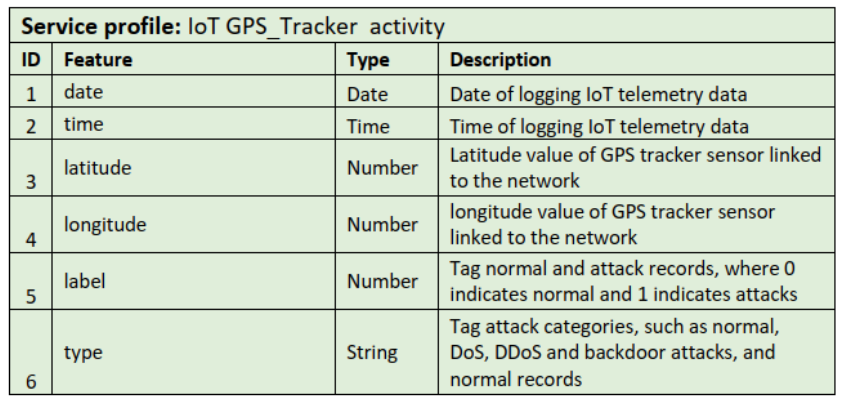

In [5]:
Train_Test_IoT_GPS = pd.read_csv('../datasets/Train_Test_IoT_dataset/Train_Test_IoT_GPS_Tracker.csv')
Train_Test_IoT_GPS

,ts,date,time,latitude,longitude,label,type
0,1556242299,25-Apr-19,18:31:39,116.521704,132.162504,1,ddos
1,1556242301,25-Apr-19,18:31:41,121.742933,135.072500,1,ddos
2,1556242306,25-Apr-19,18:31:46,121.795929,135.110198,1,ddos
3,1556242309,25-Apr-19,18:31:49,116.611216,132.224555,1,ddos
4,1556242311,25-Apr-19,18:31:51,121.841526,135.151362,1,ddos
...,...,...,...,...,...,...,...
58955,1554202928,2-Apr-19,4:02:08,1.028628,10.810522,0,normal
58956,1554202928,2-Apr-19,4:02:08,0.345361,10.727989,0,normal
58957,1554202928,2-Apr-19,4:02:08,0.423384,10.508036,0,normal
58958,1554202928,2-Apr-19,4:02:08,0.445292,10.381356,0,normal


In [6]:
Train_Test_IoT_GPS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58960 entries, 0 to 58959
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ts         58960 non-null  int64  
 1   date       58960 non-null  object 
 2   time       58960 non-null  object 
 3   latitude   58960 non-null  float64
 4   longitude  58960 non-null  float64
 5   label      58960 non-null  int64  
 6   type       58960 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 3.1+ MB


In [7]:
Train_Test_IoT_GPS.head(3)

,ts,date,time,latitude,longitude,label,type
0,1556242299,25-Apr-19,18:31:39,116.521704,132.162504,1,ddos
1,1556242301,25-Apr-19,18:31:41,121.742933,135.072500,1,ddos
2,1556242306,25-Apr-19,18:31:46,121.795929,135.110198,1,ddos


## Processamento dos Dados
#### Dimensionamento (StandardScaler / Padronização)

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
# Criando outras features usando a hora (hour-minute-second)
Train_Test_IoT_GPS[['hour', 'minute', 'second']] = Train_Test_IoT_GPS['time'].str.split(':', expand=True)
Train_Test_IoT_GPS['hour'] = Train_Test_IoT_GPS['hour'].astype(int)
Train_Test_IoT_GPS['minute'] = Train_Test_IoT_GPS['minute'].astype(int)
Train_Test_IoT_GPS['second'] = Train_Test_IoT_GPS['second'].astype(int)

# Criando outras features usando a data (day-month-year)
Train_Test_IoT_GPS.date = pd.to_datetime(Train_Test_IoT_GPS.date)
Train_Test_IoT_GPS['day'] = Train_Test_IoT_GPS.date.dt.day

# Removendo features
Train_Test_IoT_GPS.drop(['ts', 'date', 'time', 'label'], axis=1, inplace=True)
Train_Test_IoT_GPS.head()

,latitude,longitude,type,hour,minute,second,day
0,116.521704,132.162504,ddos,18,31,39,25
1,121.742933,135.072500,ddos,18,31,41,25
2,121.795929,135.110198,ddos,18,31,46,25
3,116.611216,132.224555,ddos,18,31,49,25
4,121.841526,135.151362,ddos,18,31,51,25


In [10]:
# separação de features e label
y_data = Train_Test_IoT_GPS.type
X_data = Train_Test_IoT_GPS.drop('type', axis=1)

In [11]:
X_data.head()

,latitude,longitude,hour,minute,second,day
0,116.521704,132.162504,18,31,39,25
1,121.742933,135.072500,18,31,41,25
2,121.795929,135.110198,18,31,46,25
3,116.611216,132.224555,18,31,49,25
4,121.841526,135.151362,18,31,51,25


In [12]:
X_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58960 entries, 0 to 58959
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   58960 non-null  float64
 1   longitude  58960 non-null  float64
 2   hour       58960 non-null  int32  
 3   minute     58960 non-null  int32  
 4   second     58960 non-null  int32  
 5   day        58960 non-null  int64  
dtypes: float64(2), int32(3), int64(1)
memory usage: 2.0 MB


In [13]:
y_data.head()

0    ddos
1    ddos
2    ddos
3    ddos
4    ddos
Name: type, dtype: object

In [14]:
# Não há dados catetegóricos, então o pré-processamento consiste apenas no standard scaler

In [15]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

preprocessor = Pipeline(steps=[ 
    ('numerical', StandardScaler())
])

In [16]:
X_data.head()

,latitude,longitude,hour,minute,second,day
0,116.521704,132.162504,18,31,39,25
1,121.742933,135.072500,18,31,41,25
2,121.795929,135.110198,18,31,46,25
3,116.611216,132.224555,18,31,49,25
4,121.841526,135.151362,18,31,51,25


## Divisão dos dados

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, 
                                                    shuffle=True, 
                                                    random_state=42, 
                                                    stratify=y_data)

# Reparar que está sendo usado o X_data e y_data sem passar o transform neles ainda.

In [18]:
labels = list(y_data.unique())

In [19]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

## Regressão Logística

In [20]:
from sklearn.feature_selection import SelectFromModel

# repare que eu jogue tudo na variavel 'pipeline', ela tem a etapa de preprocesamento e o seu modelo
# por isso fica mais facil utilizar as funções Pipeline no sklearn. 
# fica bem mais simples, coloquei o feature selection tbm.
pipeline = Pipeline(steps=[
    ('preprocessamento', preprocessor),
    ('feature_selection', SelectFromModel(estimator=RandomForestClassifier() , max_features=3)),
    ('classificador', LogisticRegression())
])

param_grid_LR = {
                'feature_selection__max_features': [1,2,3],
                'classificador__penalty': ['l1', 'l2'],
                'classificador__C': [0.1, 1.0, 10.0],
                'classificador__solver': ['newton-cg', 'saga'],
                'classificador__max_iter': [100, 1000],
                'classificador__multi_class': ['ovr', 'multinomial'],
                'classificador__class_weight': ['balanced']}

# Repare que o param_grid é passado o nome do classifier dois underscore 
# antes do parametro assim: nomeclassificador__parametro. O nome é passado na string do pipeline
# no caso deixei 'classificador' mesmo.
grid_search = GridSearchCV(pipeline, param_grid=param_grid_LR, cv=5, n_jobs=-1, refit=True)

In [21]:
# fit
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessamento',
                                        Pipeline(steps=[('numerical',
                                                         StandardScaler())])),
                                       ('feature_selection',
                                        SelectFromModel(estimator=RandomForestClassifier(),
                                                        max_features=3)),
                                       ('classificador',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid={'classificador__C': [0.1, 1.0, 10.0],
                         'classificador__class_weight': ['balanced'],
                         'classificador__max_iter': [100, 1000],
                         'classificador__multi_class': ['ovr', 'multinomial'],
                         'classificador__penalty': ['l1', 'l2'],
                         'classificador__solver': ['newton-cg', 'saga'],
                         'feature_selection__max_features': [1, 2, 3]})

In [22]:
X_train.head(3)

,latitude,longitude,hour,minute,second,day
53299,248.669275,252.218610,22,28,58,1
23827,64.895936,74.080268,15,41,24,26
50824,0.000000,10.000000,12,43,20,31


In [23]:
# mostra os paramentros
print(grid_search.best_params_)

{'classificador__C': 0.1, 'classificador__class_weight': 'balanced', 'classificador__max_iter': 100, 'classificador__multi_class': 'multinomial', 'classificador__penalty': 'l2', 'classificador__solver': 'newton-cg', 'feature_selection__max_features': 3}


In [24]:
# essas metricas são do conjunto de validação é pra ver como o modelo se comportou, 
# o std_score é o desvio padrão, ele tem que ser baixo.
# vc não precisa mostrar metrica de valição ou treino. o que importa é a metrica no TESTE.
# o gridsearch faz a validação cruzado k-fold, o cv=5 são 5 folds.
index = grid_search.best_index_
results = grid_search.cv_results_

mean_score = results['mean_test_score'][index]
std_score  = results['std_test_score'][index]

print(f"Validation score: {mean_score:.5f} +- {std_score:.5f}")

Validation score: 0.81355 +- 0.16023


In [25]:
# aqui eu faço a predição.  EU NÃO DEI O FIT NOVAMENTE
# olha lá em cima como eu passei o gridsearch, tem um paramentro chamado refit, quando eles está true 
# quer dizer que o modelo JÁ É treinado com os melhores parametros, por isso já dou um predict direto

y_pred = grid_search.predict(X_test)

In [27]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
# classification report. Apenas do test
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.18      1.00      0.30      1250
           1       0.40      0.49      0.44      1250
           2       0.93      0.98      0.96      1250
           3       0.95      0.29      0.44      8750
           4       0.61      0.50      0.55      1250
           5       0.99      1.00      1.00       708
           6       0.55      1.00      0.71       138
           7       0.78      0.96      0.86       144

    accuracy                           0.49     14740
   macro avg       0.67      0.78      0.66     14740
weighted avg       0.81      0.49      0.52     14740



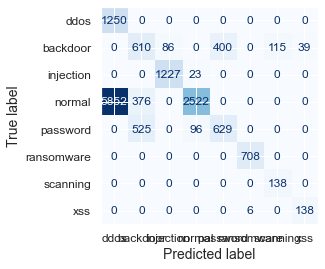

In [28]:
# matrix de confusão. Apenas do teste
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                        display_labels=labels, 
                                        #normalize = 'true', values_format='.1%',
                                        cmap=plt.cm.Blues, colorbar=False
                                        )
plt.show()

## KNeighborsClassifier

In [29]:
from sklearn.feature_selection import SelectFromModel

pipeline_knn = Pipeline(steps=[
    ('preprocessamento', preprocessor),
    ('feature_selection', SelectFromModel(estimator=RandomForestClassifier() , max_features=3)),
    ('classificador', KNeighborsClassifier())
])

param_grid_KNN = {
                'feature_selection__max_features': [1,2,3],
                'classificador__n_neighbors': [1, 3, 5, 7, 9],
                'classificador__metric': ['euclidean', 'manhatan', 'chebyshev', 'minkowski']}

grid_search = GridSearchCV(pipeline_knn, param_grid=param_grid_KNN, cv=5, n_jobs=-1, refit=True)

In [30]:
# fit
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessamento',
                                        Pipeline(steps=[('numerical',
                                                         StandardScaler())])),
                                       ('feature_selection',
                                        SelectFromModel(estimator=RandomForestClassifier(),
                                                        max_features=3)),
                                       ('classificador',
                                        KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'classificador__metric': ['euclidean', 'manhatan',
                                                   'chebyshev', 'minkowski'],
                         'classificador__n_neighbors': [1, 3, 5, 7, 9],
                         'feature_selection__max_features': [1, 2, 3]})

In [31]:
X_train.head(3)

,latitude,longitude,hour,minute,second,day
53299,248.669275,252.218610,22,28,58,1
23827,64.895936,74.080268,15,41,24,26
50824,0.000000,10.000000,12,43,20,31


In [32]:
# Exibindo os melhores parâmetros
print(grid_search.best_params_)

{'classificador__metric': 'euclidean', 'classificador__n_neighbors': 1, 'feature_selection__max_features': 2}


In [33]:
index = grid_search.best_index_
results = grid_search.cv_results_

mean_score = results['mean_test_score'][index]
std_score  = results['std_test_score'][index]

print(f"Validation score: {mean_score:.5f} +- {std_score:.5f}")

Validation score: 1.00000 +- 0.00000


In [34]:
y_pred = grid_search.predict(X_test)

In [35]:
# Classification Report (Apenas dos dados de teste)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1250
           1       1.00      1.00      1.00      1250
           2       1.00      1.00      1.00      1250
           3       1.00      1.00      1.00      8750
           4       1.00      1.00      1.00      1250
           5       1.00      1.00      1.00       708
           6       1.00      1.00      1.00       138
           7       1.00      1.00      1.00       144

    accuracy                           1.00     14740
   macro avg       1.00      1.00      1.00     14740
weighted avg       1.00      1.00      1.00     14740



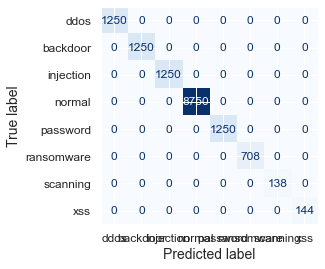

In [36]:
# Matrix de Confusão (Apenas do teste)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                        display_labels=labels, 
                                        #normalize = 'true', values_format='.1%',
                                        cmap=plt.cm.Blues, colorbar=False
                                        )
plt.show()

## PipeLine Gradient Boosting Master

In [37]:
pipeline_gbm = Pipeline(steps=[
    ('preprocessamento', preprocessor),
    ('feature_selection', SelectFromModel(estimator=RandomForestClassifier() , max_features=3)),
    ('classificador', GradientBoostingClassifier())
])

In [38]:
param_grid_GBM = {
    'feature_selection__max_features': [1,2,3],
    'classificador__learning_rate': [0.1, 0.05],
    'classificador__n_estimators': [50, 100],
    'classificador__max_depth': [2, 3],
    'classificador__min_samples_split': [2, 4],
    'classificador__min_samples_leaf': [1, 2],
    'classificador__max_features': ['auto', 'sqrt'],
    'classificador__subsample': [0.8, 1.0]}

grid_search = GridSearchCV(pipeline_gbm, param_grid=param_grid_GBM, cv=5, n_jobs=-1, refit=True)

In [39]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessamento',
                                        Pipeline(steps=[('numerical',
                                                         StandardScaler())])),
                                       ('feature_selection',
                                        SelectFromModel(estimator=RandomForestClassifier(),
                                                        max_features=3)),
                                       ('classificador',
                                        GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'classificador__learning_rate': [0.1, 0.05],
                         'classificador__max_depth': [2, 3],
                         'classificador__max_features': ['auto', 'sqrt'],
                         'classificador__min_samples_leaf': [1, 2],
                         'classificador__min_samples_split': [2, 4],
                         'classificador__n_estimators': [50, 100],
                         'classificador__subsample': [0.8, 1.0],
                         'feature_selection__max_features': [1, 2, 3]})

In [40]:
# Exibindo os melhores parâmetros
print(grid_search.best_params_)

{'classificador__learning_rate': 0.1, 'classificador__max_depth': 2, 'classificador__max_features': 'auto', 'classificador__min_samples_leaf': 1, 'classificador__min_samples_split': 2, 'classificador__n_estimators': 50, 'classificador__subsample': 0.8, 'feature_selection__max_features': 2}


In [41]:
index = grid_search.best_index_
results = grid_search.cv_results_

mean_score = results['mean_test_score'][index]
std_score  = results['std_test_score'][index]

print(f"Validation score: {mean_score:.5f} +- {std_score:.5f}")

Validation score: 1.00000 +- 0.00000


In [42]:
y_pred = grid_search.predict(X_test)

In [43]:
# Classification Report (Apenas dos dados de teste)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1250
           1       1.00      1.00      1.00      1250
           2       1.00      1.00      1.00      1250
           3       1.00      1.00      1.00      8750
           4       1.00      1.00      1.00      1250
           5       1.00      1.00      1.00       708
           6       1.00      1.00      1.00       138
           7       1.00      1.00      1.00       144

    accuracy                           1.00     14740
   macro avg       1.00      1.00      1.00     14740
weighted avg       1.00      1.00      1.00     14740



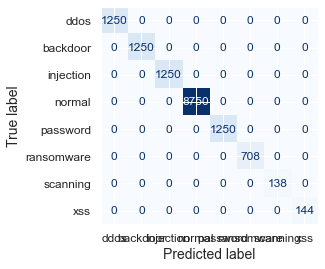

In [44]:
# Matrix de Confusão (Apenas do teste)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                        display_labels=labels, 
                                        #normalize = 'true', values_format='.1%',
                                        cmap=plt.cm.Blues, colorbar=False
                                        )
plt.show()

## PipeLine Nayve Bayes BernoulliNB

In [45]:
pipeline_nb = Pipeline(steps=[
    ('preprocessamento', preprocessor),
    ('feature_selection', SelectFromModel(estimator=RandomForestClassifier() , max_features=3)),
    ('classificador', BernoulliNB())
])

param_grid_NB = {
    'feature_selection__max_features': [1,2,3],
    'classificador__alpha': [0.1, 0.5, 1.0]}

grid_search = GridSearchCV(pipeline_nb, param_grid=param_grid_NB, cv=5, n_jobs=-1, refit=True)

In [46]:
# fit
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessamento',
                                        Pipeline(steps=[('numerical',
                                                         StandardScaler())])),
                                       ('feature_selection',
                                        SelectFromModel(estimator=RandomForestClassifier(),
                                                        max_features=3)),
                                       ('classificador', BernoulliNB())]),
             n_jobs=-1,
             param_grid={'classificador__alpha': [0.1, 0.5, 1.0],
                         'feature_selection__max_features': [1, 2, 3]})

In [47]:
# Exibindo os melhores parâmetros
print(grid_search.best_params_)

{'classificador__alpha': 0.5, 'feature_selection__max_features': 3}


In [48]:
index = grid_search.best_index_
results = grid_search.cv_results_

mean_score = results['mean_test_score'][index]
std_score  = results['std_test_score'][index]

print(f"Validation score: {mean_score:.5f} +- {std_score:.5f}")

Validation score: 0.68290 +- 0.01762


In [49]:
y_pred = grid_search.predict(X_test)

In [50]:
# Classification Report (Apenas dos dados de teste)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.93      0.64      1250
           1       0.00      0.00      0.00      1250
           2       0.00      0.00      0.00      1250
           3       0.71      1.00      0.83      8750
           4       0.00      0.00      0.00      1250
           5       0.00      0.00      0.00       708
           6       0.00      0.00      0.00       138
           7       0.00      0.00      0.00       144

    accuracy                           0.67     14740
   macro avg       0.15      0.24      0.18     14740
weighted avg       0.46      0.67      0.55     14740



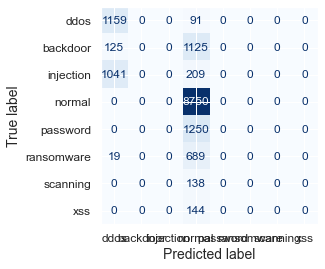

In [51]:
# Matrix de Confusão (Apenas do teste)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                        display_labels=labels, 
                                        #normalize = 'true', values_format='.1%',
                                        cmap=plt.cm.Blues, colorbar=False
                                        )
plt.show()

## PipeLine Linear Discriminant Analysis

In [52]:
pipeline_lda = Pipeline(steps=[
    ('preprocessamento', preprocessor),
    ('feature_selection', SelectFromModel(estimator=RandomForestClassifier() , max_features=3)),
    ('classificador', LinearDiscriminantAnalysis())
])

param_grid_LDA = {
    'feature_selection__max_features': [1,2,3],
    'classificador__solver': ['svd', 'lsqr', 'eigen']}

grid_search = GridSearchCV(pipeline_lda, param_grid=param_grid_LDA, cv=5, n_jobs=-1, refit=True)

In [53]:
# fit
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessamento',
                                        Pipeline(steps=[('numerical',
                                                         StandardScaler())])),
                                       ('feature_selection',
                                        SelectFromModel(estimator=RandomForestClassifier(),
                                                        max_features=3)),
                                       ('classificador',
                                        LinearDiscriminantAnalysis())]),
             n_jobs=-1,
             param_grid={'classificador__solver': ['svd', 'lsqr', 'eigen'],
                         'feature_selection__max_features': [1, 2, 3]})

In [54]:
# Exibindo os melhores parâmetros
print(grid_search.best_params_)

{'classificador__solver': 'lsqr', 'feature_selection__max_features': 3}


In [55]:
index = grid_search.best_index_
results = grid_search.cv_results_

mean_score = results['mean_test_score'][index]
std_score  = results['std_test_score'][index]

print(f"Validation score: {mean_score:.5f} +- {std_score:.5f}")

Validation score: 0.67773 +- 0.02351


In [56]:
y_pred = grid_search.predict(X_test)

In [57]:
# Classification Report (Apenas dos dados de teste)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.45      0.52      1250
           1       0.52      0.44      0.47      1250
           2       0.51      0.15      0.23      1250
           3       0.71      0.96      0.81      8750
           4       0.00      0.00      0.00      1250
           5       0.88      0.75      0.81       708
           6       1.00      0.13      0.23       138
           7       0.00      0.00      0.00       144

    accuracy                           0.69     14740
   macro avg       0.53      0.36      0.39     14740
weighted avg       0.61      0.69      0.63     14740



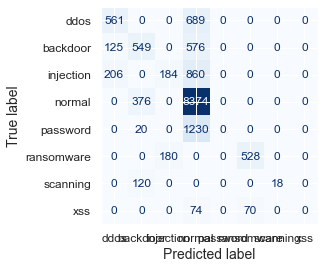

In [58]:
# Matrix de Confusão (Apenas do teste)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                        display_labels=labels, 
                                        #normalize = 'true', values_format='.1%',
                                        cmap=plt.cm.Blues, colorbar=False
                                        )
plt.show()

## PipeLine DecisionTreeClassifier

In [59]:
pipeline_dtc = Pipeline(steps=[
    ('preprocessamento', preprocessor),
    ('feature_selection', SelectFromModel(estimator=RandomForestClassifier() , max_features=3)),
    ('classificador', DecisionTreeClassifier())
])

param_grid_DTC = {
    'feature_selection__max_features': [1,2,3],
    'classificador__criterion': ['gini', 'entropy'],
    'classificador__max_depth': [2, 4, 6],
    'classificador__min_samples_split': [2, 5, 10],
    'classificador__min_samples_leaf': [1, 2, 4],
    'classificador__max_features': ['sqrt', 'log2'],
    'classificador__class_weight': [None, 'balanced']}

grid_search = GridSearchCV(pipeline_dtc, param_grid=param_grid_DTC, cv=5, n_jobs=-1, refit=True)

In [60]:
# fit
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessamento',
                                        Pipeline(steps=[('numerical',
                                                         StandardScaler())])),
                                       ('feature_selection',
                                        SelectFromModel(estimator=RandomForestClassifier(),
                                                        max_features=3)),
                                       ('classificador',
                                        DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'classificador__class_weight': [None, 'balanced'],
                         'classificador__criterion': ['gini', 'entropy'],
                         'classificador__max_depth': [2, 4, 6],
                         'classificador__max_features': ['sqrt', 'log2'],
                         'classificador__min_samples_leaf': [1, 2, 4],
                         'classificador__min_samples_split': [2, 5, 10],
                         'feature_selection__max_features': [1, 2, 3]})

In [61]:
# Exibindo os melhores parâmetros
print(grid_search.best_params_)

{'classificador__class_weight': None, 'classificador__criterion': 'entropy', 'classificador__max_depth': 6, 'classificador__max_features': 'log2', 'classificador__min_samples_leaf': 1, 'classificador__min_samples_split': 2, 'feature_selection__max_features': 2}


In [62]:
index = grid_search.best_index_
results = grid_search.cv_results_

mean_score = results['mean_test_score'][index]
std_score  = results['std_test_score'][index]

print(f"Validation score: {mean_score:.5f} +- {std_score:.5f}")

Validation score: 1.00000 +- 0.00000


In [63]:
y_pred = grid_search.predict(X_test)

In [64]:
# Classification Report (Apenas dos dados de teste)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1250
           1       0.96      1.00      0.98      1250
           2       1.00      1.00      1.00      1250
           3       1.00      0.99      1.00      8750
           4       1.00      0.95      0.98      1250
           5       1.00      1.00      1.00       708
           6       0.69      0.70      0.70       138
           7       1.00      1.00      1.00       144

    accuracy                           0.99     14740
   macro avg       0.95      0.96      0.96     14740
weighted avg       0.99      0.99      0.99     14740



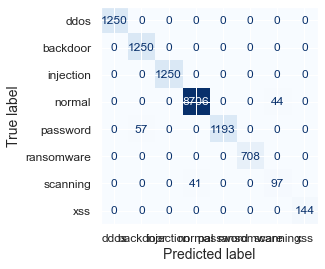

In [65]:
# Matrix de Confusão (Apenas do teste)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                        display_labels=labels, 
                                        #normalize = 'true', values_format='.1%',
                                        cmap=plt.cm.Blues, colorbar=False
                                        )
plt.show()

## PipeLine RandomForestClassifier

In [66]:
pipeline_rfc = Pipeline(steps=[
    ('preprocessamento', preprocessor),
    ('feature_selection', SelectFromModel(estimator=RandomForestClassifier() , max_features=3)),
    ('classificador', RandomForestClassifier())
])

param_grid_RFC = {
    'feature_selection__max_features': [1,2,3],
    'classificador__n_estimators': [100, 300, 500],
    'classificador__max_depth': [3, 5, 7],
    'classificador__min_samples_split': [2, 5, 10],
    'classificador__min_samples_leaf': [1, 2, 4],
    'classificador__max_features': ['sqrt', 'log2'],
    'classificador__bootstrap': [True, False]}

grid_search = GridSearchCV(pipeline_rfc, param_grid=param_grid_RFC, cv=5, n_jobs=-1, refit=True)

In [67]:
# fit
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessamento',
                                        Pipeline(steps=[('numerical',
                                                         StandardScaler())])),
                                       ('feature_selection',
                                        SelectFromModel(estimator=RandomForestClassifier(),
                                                        max_features=3)),
                                       ('classificador',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'classificador__bootstrap': [True, False],
                         'classificador__max_depth': [3, 5, 7],
                         'classificador__max_features': ['sqrt', 'log2'],
                         'classificador__min_samples_leaf': [1, 2, 4],
                         'classificador__min_samples_split': [2, 5, 10],
                         'classificador__n_estimators': [100, 300, 500],
                         'feature_selection__max_features': [1, 2, 3]})

In [68]:
# Exibindo os melhores parâmetros
print(grid_search.best_params_)

{'classificador__bootstrap': True, 'classificador__max_depth': 7, 'classificador__max_features': 'sqrt', 'classificador__min_samples_leaf': 1, 'classificador__min_samples_split': 2, 'classificador__n_estimators': 100, 'feature_selection__max_features': 2}


In [69]:
index = grid_search.best_index_
results = grid_search.cv_results_

mean_score = results['mean_test_score'][index]
std_score  = results['std_test_score'][index]

print(f"Validation score: {mean_score:.5f} +- {std_score:.5f}")

Validation score: 1.00000 +- 0.00000


In [70]:
y_pred = grid_search.predict(X_test)

In [71]:
# Classification Report (Apenas dos dados de teste)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1250
           1       1.00      1.00      1.00      1250
           2       1.00      1.00      1.00      1250
           3       1.00      1.00      1.00      8750
           4       1.00      1.00      1.00      1250
           5       1.00      1.00      1.00       708
           6       1.00      1.00      1.00       138
           7       1.00      1.00      1.00       144

    accuracy                           1.00     14740
   macro avg       1.00      1.00      1.00     14740
weighted avg       1.00      1.00      1.00     14740



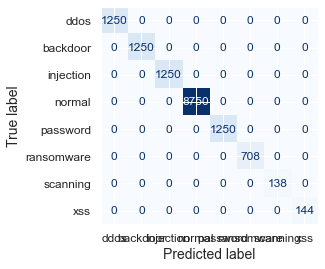

In [72]:
# Matrix de Confusão (Apenas do teste)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                        display_labels=labels, 
                                        #normalize = 'true', values_format='.1%',
                                        cmap=plt.cm.Blues, colorbar=False
                                        )
plt.show()